
## 210968004
# B SOURABHGAGAN RAO
## Week 6 

# EXERCISE 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import scipy.stats as stats
from sklearn.cluster import KMeans
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
pip install textblob


Note: you may need to restart the kernel to use updated packages.


In [3]:
#Q1 Convert datestamp column to a datetime object and Set the datestamp columns as the 
# index of your DataFrame. Check if there are missing values in each column.

Data1=pd.read_csv("employment.csv",parse_dates=True,index_col='datestamp')
Data1.head()

,Agriculture,Business services,Construction,Durable goods manufacturing,Education and Health,Finance,Government,Information,Leisure and hospitality,Manufacturing,Mining and Extraction,Nondurable goods manufacturing,Other,Self-employed,Transportation and Utilities,Wholesale and Retail Trade
datestamp,,,,,,,,,,,,,,,,
2000-01-01,10.3,5.7,9.7,3.2,2.3,2.7,2.1,3.4,7.5,3.6,3.9,4.4,4.9,2.3,4.3,5.0
2000-02-01,11.5,5.2,10.6,2.9,2.2,2.8,2.0,2.9,7.5,3.4,5.5,4.2,4.1,2.5,4.0,5.2
2000-03-01,10.4,5.4,8.7,2.8,2.5,2.6,1.5,3.6,7.4,3.6,3.7,5.1,4.3,2.0,3.5,5.1
2000-04-01,8.9,4.5,5.8,3.4,2.1,2.3,1.3,2.4,6.1,3.7,4.1,4.0,4.2,2.0,3.4,4.1
2000-05-01,5.1,4.7,5.0,3.4,2.7,2.2,1.9,3.5,6.2,3.4,5.3,3.6,4.5,1.9,3.4,4.3


In [4]:
Data2=pd.read_csv("amazon_baby.csv")
Data2.head()

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5


In [5]:
Data1.columns.value_counts()

Agriculture                       1
Business services                 1
Construction                      1
Durable goods manufacturing       1
Education and Health              1
Finance                           1
Government                        1
Information                       1
Leisure and hospitality           1
Manufacturing                     1
Mining and Extraction             1
Nondurable goods manufacturing    1
Other                             1
Self-employed                     1
Transportation and Utilities      1
Wholesale and Retail Trade        1
dtype: int64

<AxesSubplot:>

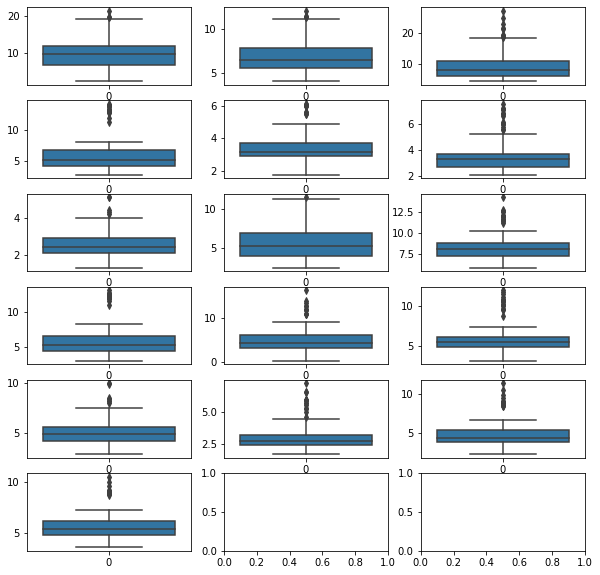

In [6]:
#Q2-Generate a boxplot to find the distribution of unemployment rate for every industry.
fig,axs=plt.subplots(6,3,figsize=(10,10))  
sns.boxplot(data=Data1["Agriculture"],ax=axs[0,0])
sns.boxplot(data=Data1["Business services"],ax=axs[0,1])
sns.boxplot(data=Data1["Construction"],ax=axs[0,2])
sns.boxplot(data=Data1["Durable goods manufacturing"],ax=axs[1,0])
sns.boxplot(data=Data1["Education and Health"],ax=axs[1,1])   
sns.boxplot(data=Data1["Finance"],ax=axs[1,2])
sns.boxplot(data=Data1["Government"],ax=axs[2,0])
sns.boxplot(data=Data1["Information"],ax=axs[2,1])
sns.boxplot(data=Data1["Leisure and hospitality"],ax=axs[2,2])
sns.boxplot(data=Data1["Manufacturing"],ax=axs[3,0])
sns.boxplot(data=Data1["Mining and Extraction"],ax=axs[3,1])
sns.boxplot(data=Data1["Nondurable goods manufacturing"],ax=axs[3,2])
sns.boxplot(data=Data1["Other"],ax=axs[4,0])
sns.boxplot(data=Data1["Self-employed"],ax=axs[4,1])
sns.boxplot(data=Data1["Transportation and Utilities"],ax=axs[4,2])
sns.boxplot(data=Data1["Wholesale and Retail Trade"],ax=axs[5,0])


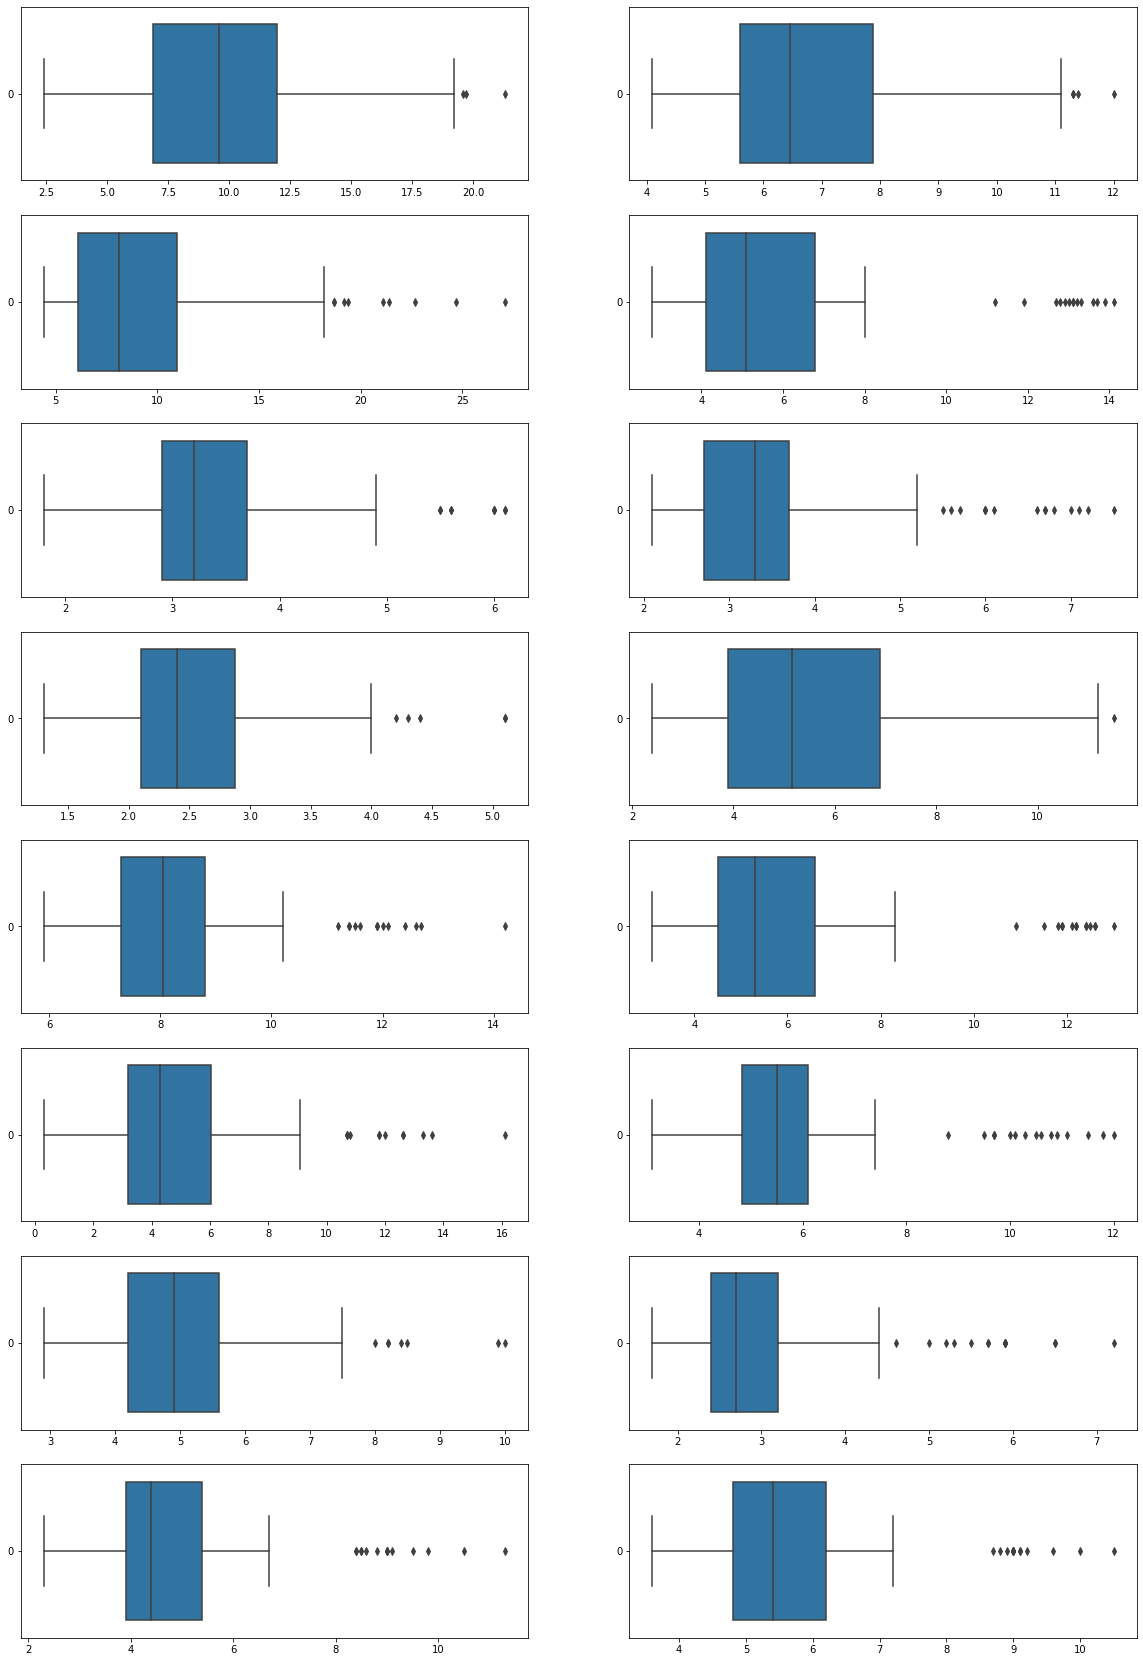

In [7]:
#Q2-Generate a boxplot to find the distribution of unemployment rate for every industry.
fig,axs=plt.subplots(8,2,figsize=(20,30))
j=0
a=Data1.columns
for z in range(0,8,1):
        for y in range(0,2,1):
            sns.boxplot(data=Data1[a[j]],ax=axs[z][y],orient='h')
            j=j+1

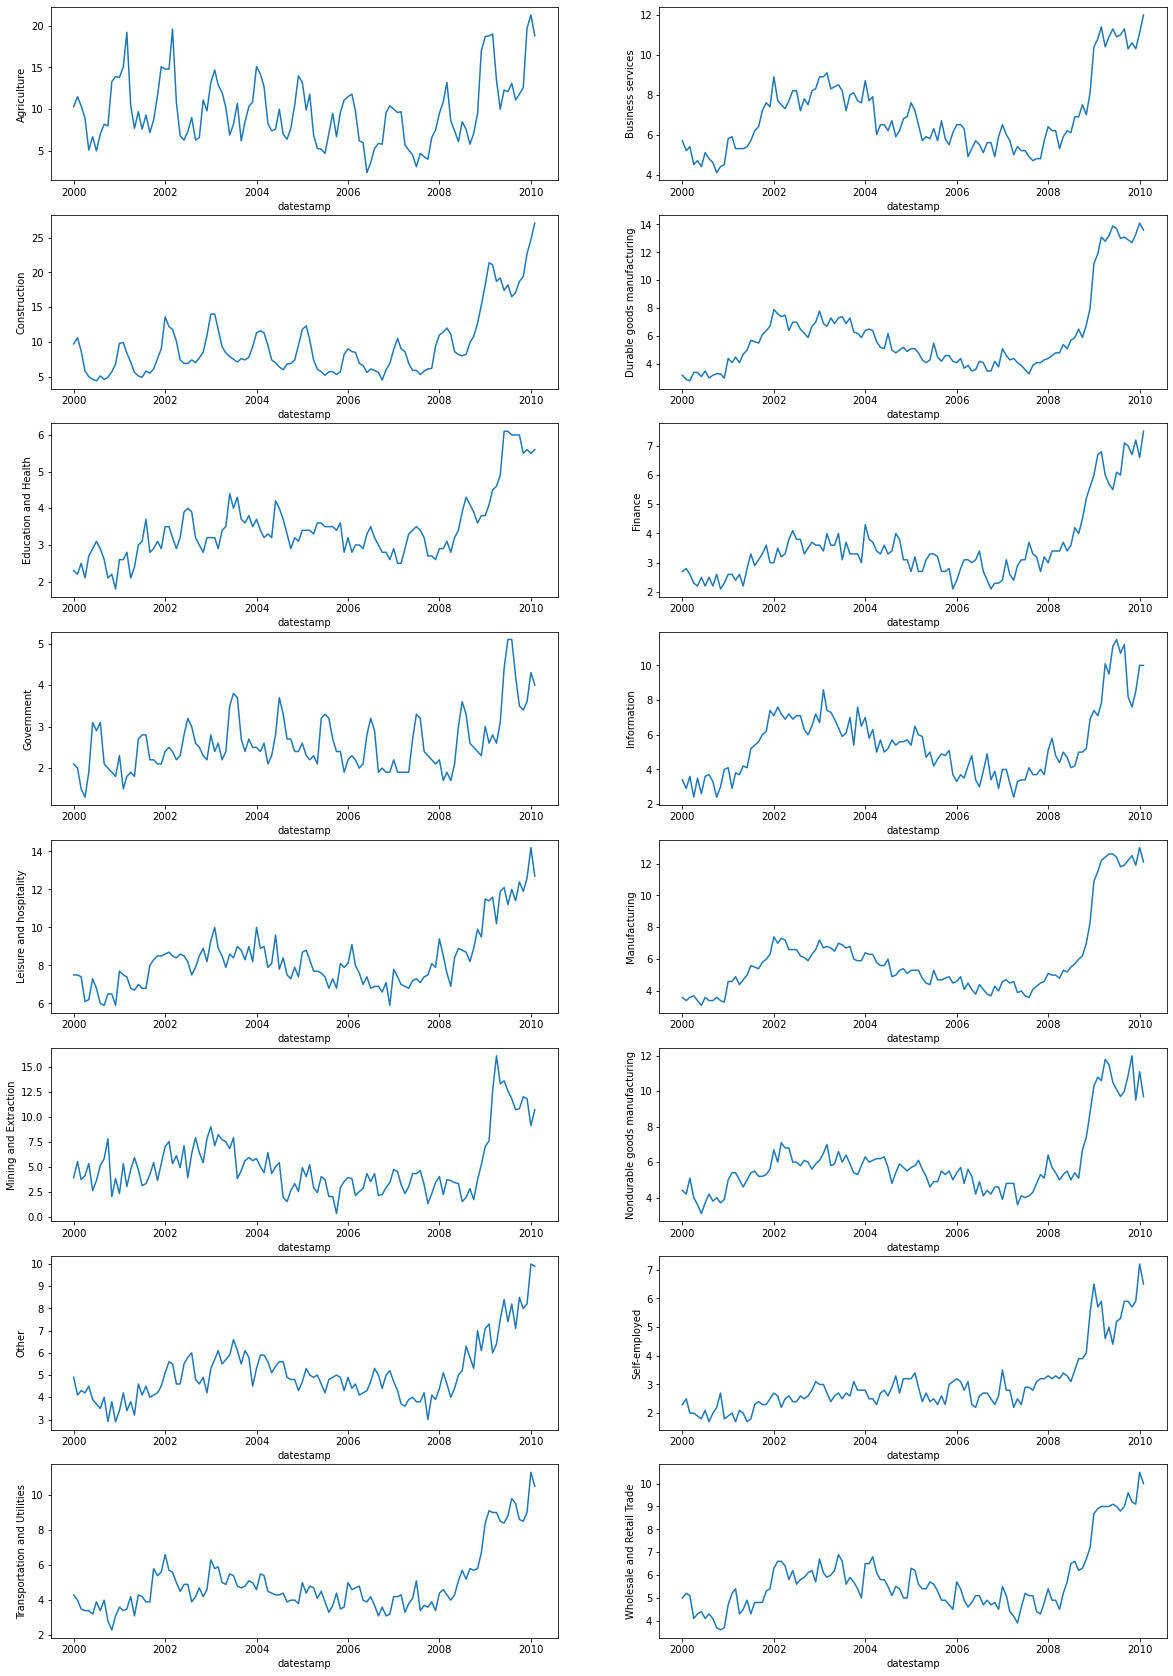

In [8]:
#Q3-Using line chart Visualize the unemployment rate of workers by industry.

fig,axs=plt.subplots(8,2,figsize=(20,30))
j=0
a=Data1.columns
for z in range(0,8,1):
        for y in range(0,2,1):
            sns.lineplot(data=Data1[a[j]],ax=axs[z][y])
            j=j+1

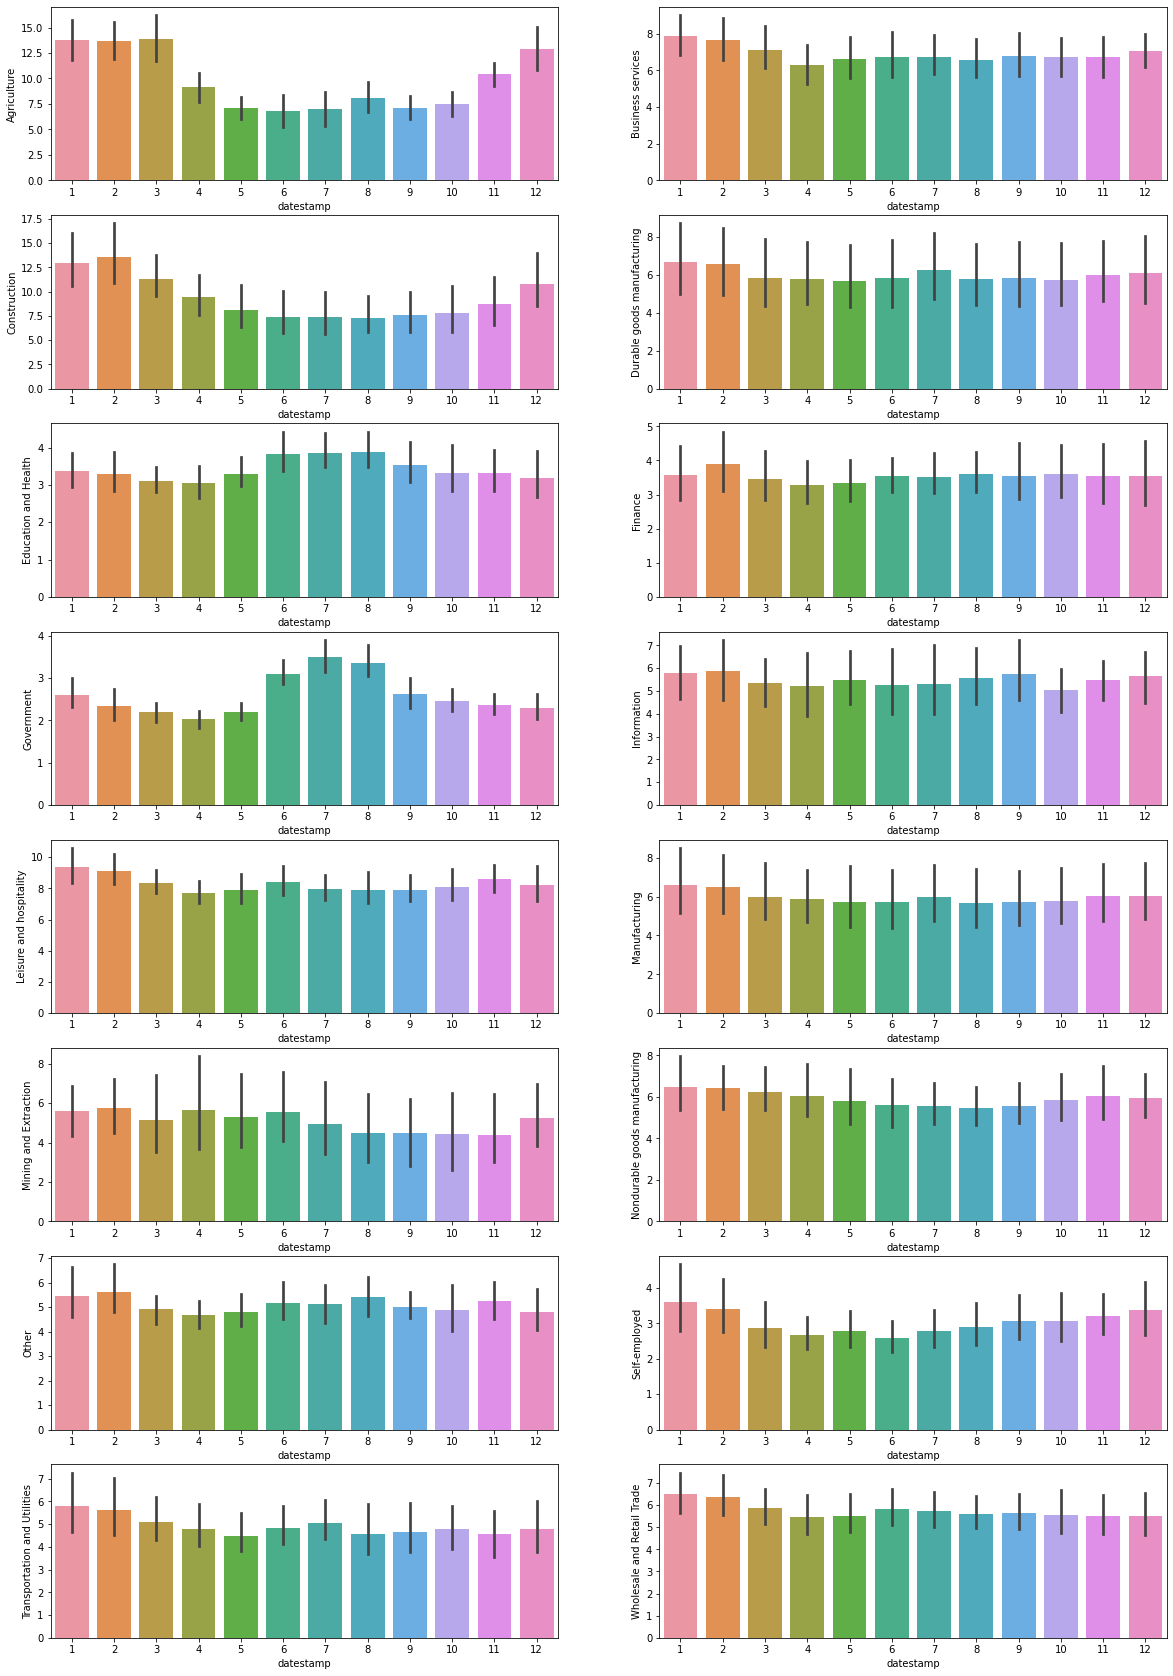

In [9]:
#Q4-Plot the monthly and yearly trends.
fig,axs=plt.subplots(8,2,figsize=(20,30))
j=0
a=Data1.columns
for z in range(0,8,1):
        for y in range(0,2,1):
            sns.barplot(y=Data1[a[j]],x=Data1.index.month,ax=axs[z][y])
            j=j+1

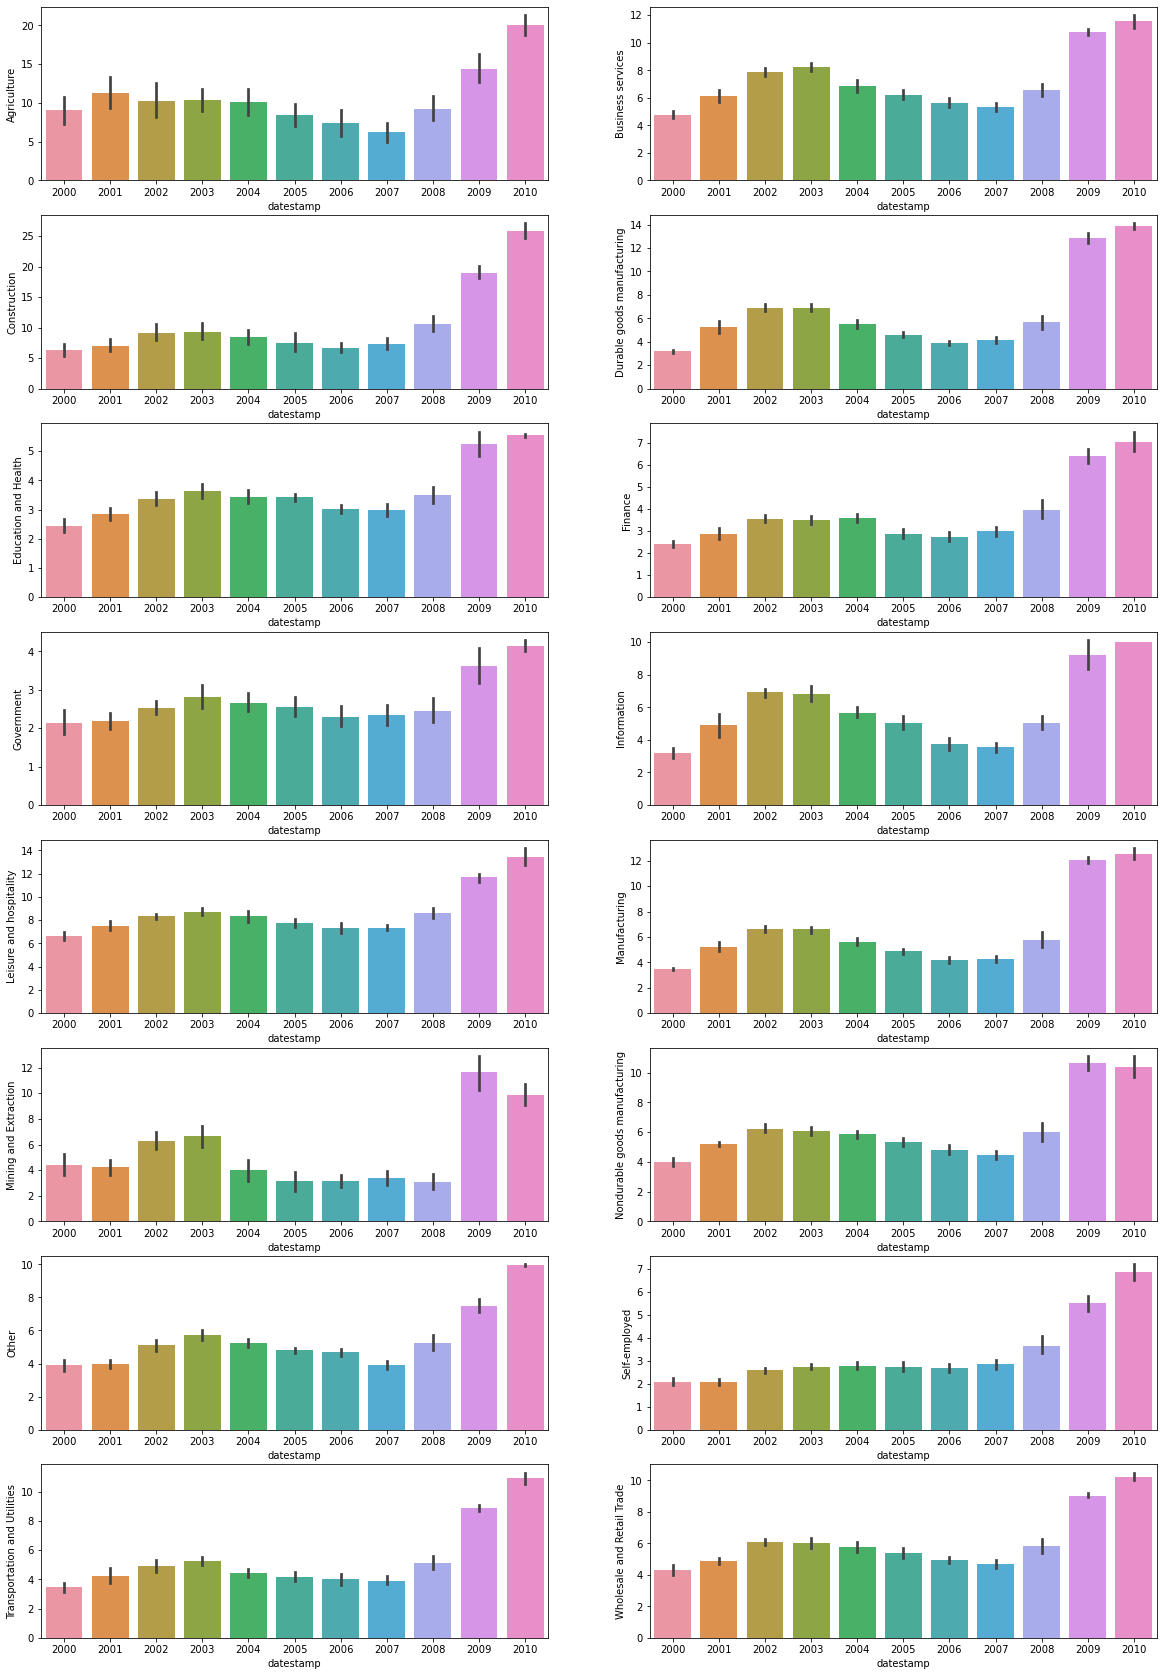

In [10]:
#Q4-Plot the monthly and yearly trends.
fig,axs=plt.subplots(8,2,figsize=(20,30))
j=0
a=Data1.columns
for z in range(0,8,1):
        for y in range(0,2,1):
            sns.barplot(y=Data1[a[j]],x=Data1.index.year,ax=axs[z][y])
            j=j+1

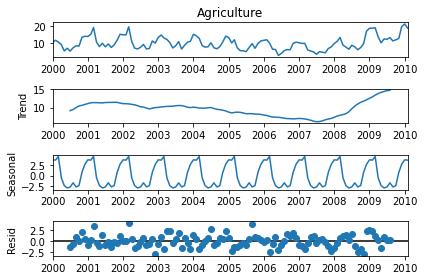

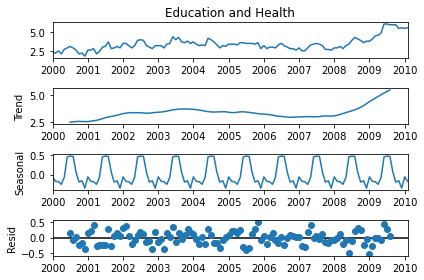

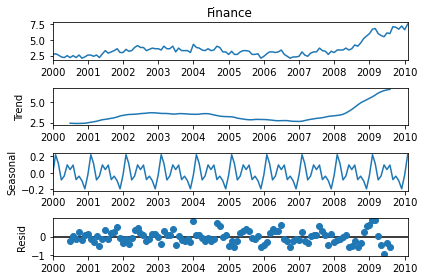

In [11]:
#Q5-Apply time series decomposition to your dataset to visualize the trend and seasonality
#Q6-Visualize the seasonality of Agriculture, Health and Finance sector
j=0
a=['Agriculture','Education and Health','Finance']
for z in range(0,3,1):
            result = seasonal_decompose(Data1[a[j]], model='additive')
            result.plot()
            plt.show()
            j=j+1

# EXERCISE 2


In [12]:
df = pd.read_csv('amazon_baby.csv')
df.head()

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5


In [13]:
#Q1. Check the number of the reviews received for each product.
df.name.value_counts()

Vulli Sophie the Giraffe Teether                                                                                                                                                                                                                                                                                                                       785
Simple Wishes Hands-Free Breastpump Bra, Pink, XS-L                                                                                                                                                                                                                                                                                                    562
Infant Optics DXR-5 2.4 GHz Digital Video Baby Monitor with Night Vision                                                                                                                                                                                                                                          

In [14]:
#Q2. Check the products that have more than 15 reviews.
df.name.value_counts().loc[lambda x : x > 15]

Vulli Sophie the Giraffe Teether                                                              785
Simple Wishes Hands-Free Breastpump Bra, Pink, XS-L                                           562
Infant Optics DXR-5 2.4 GHz Digital Video Baby Monitor with Night Vision                      561
Baby Einstein Take Along Tunes                                                                547
Cloud b Twilight Constellation Night Light, Turtle                                            520
                                                                                             ... 
Summer Infant Keep Me Clean Disposable Potty Protectors, Green/White,(Pack of 2), 10-Count     16
Vulli Products - Sophie The Giraffe Teething Ring - Gift Boxed! - 100% Natural rubber          16
Itzy Ritzy Shopping Cart and High Chair Cover, Avocado Damask                                  16
The First Years American Red Cross Deluxe Baby Healthcare and Grooming Kit                     16
Medela 100% Cotton W

In [15]:
#Q3. Find any missing review are present or not, If present remove those data
df.isnull().sum()
df = df[df.review.notna()]

In [16]:
#Q4. Clean the data and replace the contractions with their expansions.
contractions = {
"a'ight":"alright",
"ain't":"are not",
"amn't":"am not",
"aren't":"are not",
"can't":"cannot",
"'cause": "because",
"could've":"could have",
"couldn't":"could not",
"couldn't've":"could not have",
"daren't":"dare not",
"daresn't":"dare not",
"dasn't":"dare not",
"didn't":"did not",
"doesn't":"does not",
"don't":"do not",
"everybody's":"everybody is",
"everyone's":"everyone is",
"giv'n":"given",
"gonna":"going to",
"gon't":"go not", 
"gotta":"got to",
"hadn't":"had not",
"had've":"had have",
"hasn't":"has not",
"haven't":"have not",
"he'd":"he had", 
"he'll":"he will",
"he's":"he is",
"here's":"here is",
"how'd":"how did",
"how'll":"how will",
"how're":"how are",
"how's":"how is",
"I'd":"I had",
"I'd've":"I would have",
"I'd'nt":"I would not",
"I'd'nt've":"I would not have",
"I'll":"I will",
"I'm":"I am",
"I've":"I have",
"isn't":"is not",
"it'd":"it would",
"it'll":"it will",
"it's":"it is",
"let's":"let us",
"ma'am":"madam",
"mayn't":"may not",
"may've":"may have",
"mightn't":"might not",
"might've":"might have",
"mustn't":"must not",
"mustn't've":"must not have",
"must've":"must have",
"needn't":"need not",
"needn't've":"need not have",
"o'clock":"of the clock",
"oughtn't":"ought not",
"oughtn't've":"ought not have",
"shan't":"shall not",
"she'd":"she would",
"she'll":"she will",
"she's":"she is",
"should've":"should have",
"shouldn't":"should not",
"shouldn't've":"should not have",
"somebody's":"somebody is",
"someone's":"someone is",
"something's":"something is",
"so're":"so are",
"so’s":"so is",
"so’ve":"so have",
"that'll":"that will",
"that're":"that are",
"that's":"that is",
"that'd":"that would",
"there'd":"there would",
"there'll":"there will",
"there're":"there are",
"there's":"there is",
"these're":"these are",
"these've":"these have",
"they'd":"they would",
"they'll":"they will",
"they're":"they are",
"they've":"they have",
"this's":"this is",
"those're":"those are",
"those've":"those have",
"to've":"to have",
"wasn't":"was not",
"we'd":"we would",
"we'd've":"we would have",
"we'll":"we will",
"we're":"we are",
"we've":"we have",
"weren't":"were not",
"what'd":"what did",
"what'll":"what will",
"what're":"what are",
"what's":"what is",
"what've":"what have",
"when's":"when is",
"where'd":"where did",
"where'll":"where will",
"where're":"where are",
"where's":"where is",
"where've":"where have",
"which'd":"which would",
"which'll":"which will",
"which're":"which are",
"which's":"which is",
"which've":"which have",
"who'd":"who would",
"who'd've":"who would have",
"who'll":"who will",
"who're":"who are",
"who's":"who is",
"who've":"who have",
"why'd":"why did",
"why're":"why are",
"why's":"why is",
"won't":"will not",
"would've":"would have",
"wouldn't":"would not",
"wouldn't've":"would not have",
"y'at":"you at",
"yes’m":"yes madam",
"you'd":"you would",
"you'll":"you will",
"you're":"you are",
"you've":"you have"}

In [17]:
def cont_to_exp(x):
    if type(x) is str:
        x = x.replace('\\','')
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        return x
    else:
        return x
    
df['review'] = df['review'].apply(lambda x:cont_to_exp(x))

In [18]:
#Q5. Add the Polarity, length of the review, the word count and average word length of each review.
from textblob import TextBlob

df['polarity'] = df['review'].apply(lambda x: TextBlob(x).sentiment.polarity)


df['review_len'] = df['review'].apply(lambda x:len(x))

df['word_count'] = df['review'].apply(lambda x: len(x.split()))


def get_avg_word_len(x):
    words = x.split()
    word_len = 0
    for word in words:
        word_len = word_len + len(word)
        
    return word_len/len(words) 


df['avg_word_len'] = df['review'].apply(lambda x: get_avg_word_len(x))

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

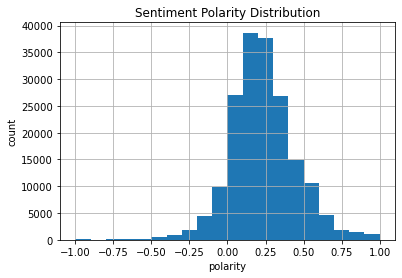

In [19]:
#Q6. Visualize the distribution of the word count, review length, and polarity.
df['polarity'].hist(bins=20)
plt.xlabel('polarity')
plt.ylabel('count')
plt.title('Sentiment Polarity Distribution')




Text(0.5, 1.0, 'Review Text Length Distribution')

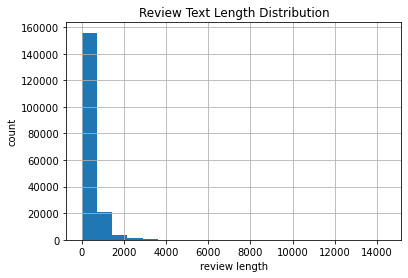

In [20]:
# histogram for review length
df['review_len'].hist(bins=20)
plt.xlabel('review length')
plt.ylabel('count')
plt.title('Review Text Length Distribution')


Text(0.5, 1.0, 'Word Count Distribution')

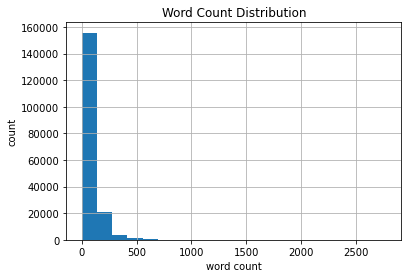

In [21]:
# histogram for word count
df['word_count'].hist(bins=20)
plt.xlabel('word count')
plt.ylabel('count')
plt.title('Word Count Distribution')

Text(0.5, 1.0, 'Polarity considering Rating')

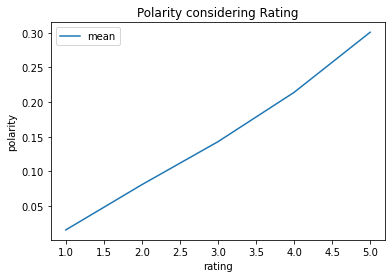

In [22]:
#Q7. Visualize polarity considering the rating.
df.groupby(by='rating').polarity.agg([np.mean]).plot()
plt.xlabel('rating')
plt.ylabel('polarity')
plt.title('Polarity considering Rating')

Text(0.5, 1.0, 'count of the reviews of each rating')

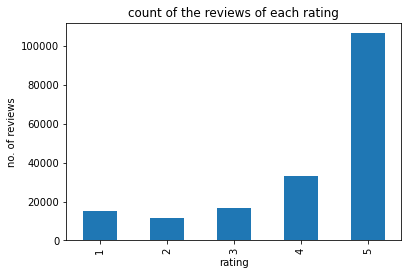

In [23]:
#Q8. Visualize the count of the reviews of each rating available in the dataset.
df.groupby(by='rating').review.count().plot.bar()
plt.xlabel('rating')
plt.ylabel('no. of reviews')
plt.title('count of the reviews of each rating')

In [24]:
#Q9. List the Top 20 products based on the polarity
df.sort_values(by='polarity', ascending=False)[0:20]



,name,review,rating,polarity,review_len,word_count,avg_word_len
121032,"BOB Ironman Duallie Stroller, Yellow",Best one out there for running with 2 kids. My...,5,1.0,116,24,3.875000
152316,God Bless Plush Lamb Wubbanub Pacifier by Mary...,Great Pacifiers!,5,1.0,16,2,7.500000
8060,"HALO SleepSack Micro-Fleece Wearable Blanket, ...",My 1yo daughter has to wear a hip abduction br...,5,1.0,121,22,4.545455
177173,"Angel Dear Blankie, Blue Giraffe",These make excellent shower gifts. My daughte...,5,1.0,130,24,4.416667
75438,Lambs &amp; Ivy Bedtime Originals Hello Kitty ...,My granddaughter's room is done in hello kitty...,5,1.0,118,21,4.571429
162222,MAM Eco 2+ Orthodonic Pacifiers 3 Ct.,These are always the best. My daughter does no...,5,1.0,112,21,4.380952
181853,"Graco Size4Me 65 Convertible Car Seat, Pierce",Awesome car seat. Fits well in my four runner ...,5,1.0,67,13,4.230769
21341,Summer Infant Gentle Vibrations Massager And T...,Great toothbrush! Helps my son with his feedin...,5,1.0,111,20,4.600000
2366,Prince Lionheart Table Edge Guard with 4 Corne...,Perfect choice to protect my grandsons face!!!...,5,1.0,115,21,4.523810
182810,Chummie Potty Training Ladder Step Up Seat,THEE BEST EVER,5,1.0,14,3,4.000000


Text(0.5, 1.0, 'Review Length vs Rating')

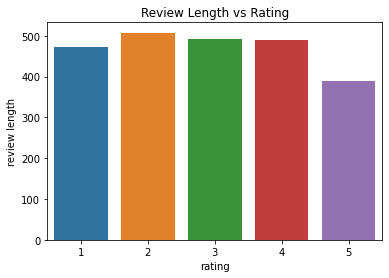

In [25]:
#Q10. Visualize to check whether the review length changes with rating.
sns.barplot(x='rating', y='review_len', data=df, ci=None)
plt.xlabel('rating')
plt.ylabel('review length')
plt.title('Review Length vs Rating')

In [26]:
#Q11. Visualize the distribution of Top 25 Unigram, Bigram and Trigram.
def get_top_n_words(x, n=25):
    vec = CountVectorizer(stop_words='english').fit(x)
    bag_of_words = vec.transform(x)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

Text(0.5, 1.0, 'Unigrams Count')

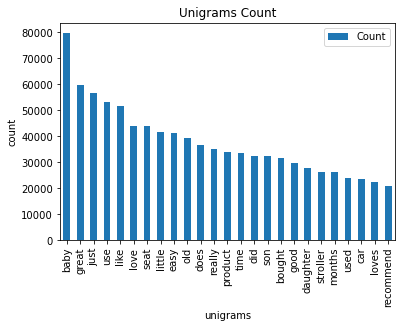

In [27]:
common_words = get_top_n_words(df['review'], 25)
common_words
df1 = pd.DataFrame(common_words, columns = ['Unigram Text' , 'Count'])

df1.set_index('Unigram Text', drop=True, inplace=True)
df1.plot.bar()
plt.xlabel('unigrams')
plt.ylabel('count')
plt.title('Unigrams Count')

In [28]:

def get_top_n_bigram(x, n=25):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(x)
    bag_of_words = vec.transform(x)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

Text(0.5, 1.0, 'BIgrams Count')

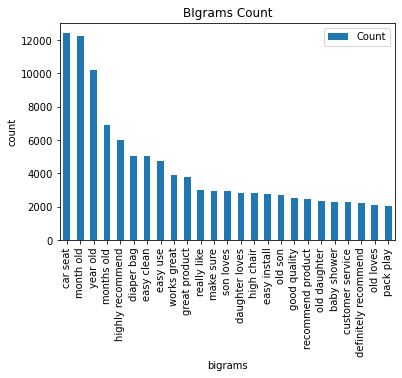

In [29]:
common_words = get_top_n_bigram(df['review'], 25)
common_words
df1 = pd.DataFrame(common_words, columns = ['Bigram Text' , 'Count'])

df1.set_index('Bigram Text', drop=True, inplace=True)
df1.plot.bar()
plt.xlabel('bigrams')
plt.ylabel('count')
plt.title('BIgrams Count')

In [30]:
def get_top_n_trigram(x, n=25):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words="english").fit(x)
    bag_of_words = vec.transform(x)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

Text(0.5, 1.0, 'Trigrams Count')

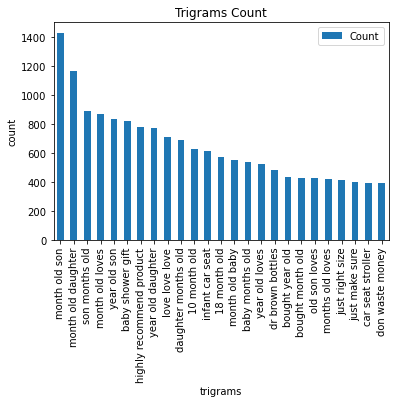

In [31]:
common_words = get_top_n_trigram(df['review'], 25)
common_words
df1 = pd.DataFrame(common_words, columns = ['Trigram Text' , 'Count'])

df1.set_index('Trigram Text', drop=True, inplace=True)
df1.plot.bar()
plt.xlabel('trigrams')
plt.ylabel('count')
plt.title('Trigrams Count')

In [32]:
##END